<a href="https://colab.research.google.com/github/AMITH-008/Mini-Project/blob/main/Weather_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [165]:
import os
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split #TO SPLIT THE DATASET INTO TRAIN AND TEST DATA
from sklearn.svm import SVC #SUPPORT VECTOR MACHINE ALGORITHM
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

**DATA GATHERING AND PREPROCESSING**

In [167]:
kinds = ["Cloudy", "Rainy", "Sunrise", "Sunshine"]
flat_image = []
target = []
dir = "/content/Weather_Dataset/Weather"
try:
  os.rmdir(os.path.join(dir, os.listdir(dir)[0]))
except:
  pass

#Resize the images and storing it in dataftrame
for folder in os.listdir(dir):
  num = kinds.index(folder)
  path = os.path.join(dir, folder)
  for img in os.listdir(path):
    image= imread(os.path.join(path,img))
    image_resize = resize(image, output_shape=(64,64,3))
    flat_image.append(image_resize.flatten())
    target.append(num)

**SPLITTING DATASET AS TRAINING AND TESTING DATASET**

In [168]:
x_train, x_test, y_train, y_test = train_test_split(flat_image, target, test_size=0.1, random_state=1)

**TRAINING THE MODEL AND HYPERTUNING PARAMETERS USING SVM CLASSIFIER**

In [169]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(gamma='scale')
parameter_grid = {'C':[1, 2, 3, 7, 10], 'kernel':['linear', 'rbf']}
classifier = GridSearchCV(estimator=model, param_grid=parameter_grid,scoring='accuracy',cv=5,n_jobs=-1)

In [170]:
classifier.fit(x_train , y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 7, 10], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [171]:
best_parameters = classifier.best_params_
print("BEST_PARAMETERS:",best_parameters)

BEST_PARAMETERS: {'C': 10, 'kernel': 'rbf'}


In [172]:
best_result = classifier.best_score_
print("BEST_SCORE: ",best_result)

BEST_SCORE:  0.8486257928118393


In [173]:
print("classifier_score: ", classifier.score(x_test, y_test))

classifier_score:  0.92


**EVALUATION OF MODEL ON TEST DATA**

Text(69.0, 0.5, 'True_Values')

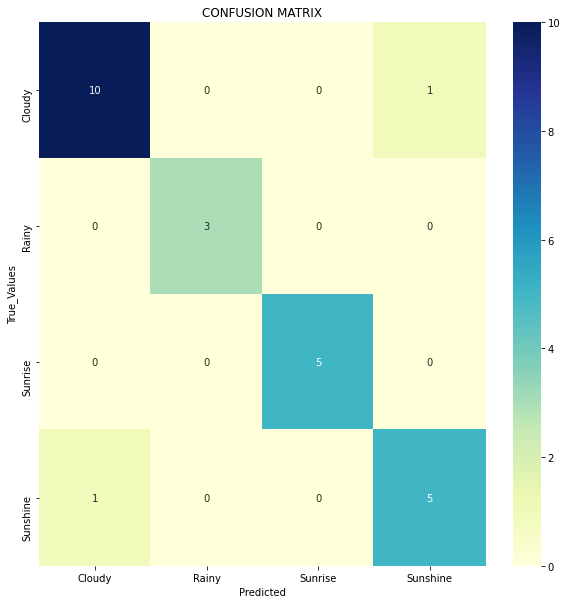

In [174]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sb.heatmap(cm, annot=True, cmap="YlGnBu",xticklabels=kinds, yticklabels=kinds)
plt.title("CONFUSION MATRIX")
plt.xlabel("Predicted")
plt.ylabel("True_Values")

In [175]:
print("CLASSIFICATION_REPORT:\n",classification_report(y_test, y_pred))
print("ACCURACY_SCORE: ",accuracy_score(y_test, y_pred))

CLASSIFICATION_REPORT:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       0.83      0.83      0.83         6

    accuracy                           0.92        25
   macro avg       0.94      0.94      0.94        25
weighted avg       0.92      0.92      0.92        25

ACCURACY_SCORE:  0.92


**TESTING MODEL ON NEW IMAGES**

In [176]:
path = "/content/Weather_Dataset/New_data"
true = os.listdir(path)
result = []
for img in os.listdir(path):
  img_path= os.path.join(path, img)
  test_image = imread(img_path)
  test_image_resize = resize(test_image, (64,64,3))
  flat_test_image = test_image_resize.flatten()
  result.append(kinds[classifier.predict([flat_test_image])[0]])


In [177]:
df = pd.DataFrame({"TRUE_IMAGE":true, "PREDICTED_IMAGE":result})
print(df)

       TRUE_IMAGE PREDICTED_IMAGE
0    shine131.jpg           Rainy
1     shine97.jpg        Sunshine
2      rain67.jpg          Cloudy
3   sunrise75.jpg         Sunrise
4     shine86.jpg        Sunshine
5   sunrise78.jpg         Sunrise
6   cloudy139.jpg          Cloudy
7   sunrise20.jpg         Sunrise
8      rain34.jpg           Rainy
9      rain72.jpg          Cloudy
10  cloudy138.jpg          Cloudy
11  cloudy112.jpg        Sunshine
